# AI/ML Training Assignment # 3 Regression Analysis using Machine Learning Algorithms 

# Q1. What will you perform based on the target column? 
## - a) Linear Regression, b) Logistic Regression

# Answer - As the dependent variable is Salary which is a quantative (numerical data) "Linera Regression" should be performed for prediction 

In [130]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
np.set_printoptions(precision=4, linewidth=100)

In [131]:
salary_df = pd.read_csv( 'salary.csv' )
salary_df.head( 10 )

,Age,Gender,Education_Level,Years_of_Experience,Salary
0,32,1,0,5.0,90000
1,28,0,1,3.0,65000
2,45,1,2,15.0,150000
3,36,0,0,7.0,60000
4,52,1,1,20.0,200000
5,29,1,0,2.0,55000
6,42,0,1,12.0,120000
7,31,1,0,4.0,80000
8,26,0,0,1.0,45000
9,38,1,2,10.0,110000


In [132]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    int64  
 1   Gender               373 non-null    int64  
 2   Education_Level      373 non-null    int64  
 3   Years_of_Experience  373 non-null    float64
 4   Salary               373 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 14.7 KB


# Q2&3. Plot (scatterplot) 

## Case 1:the 'Years of Experience'(X-axis) and the 'Salary'(Y-axis). What is the relation between these two columns? 
## Case 2: the 'Age'(X-axis) and the 'Salary'(Y-axis). What is the relation between these two columns?

In [133]:
import matplotlib.pyplot as plt 
import seaborn as sn 
%matplotlib inline

In [134]:
import warnings
warnings.filterwarnings('ignore')

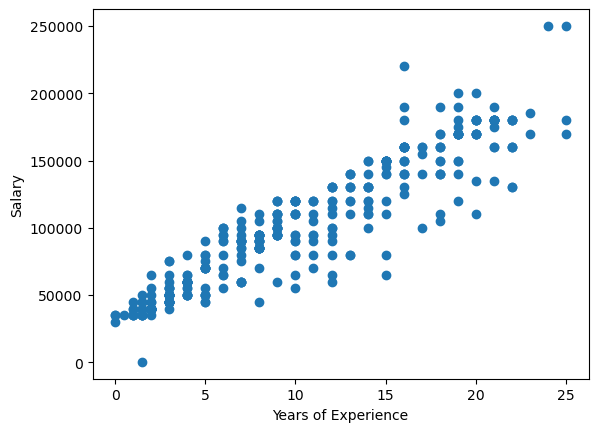

In [135]:
#Case 1


plt.scatter(x = salary_df['Years_of_Experience'],
            y = salary_df['Salary']);
plt.xlabel('Years of Experience')
plt.ylabel('Salary');

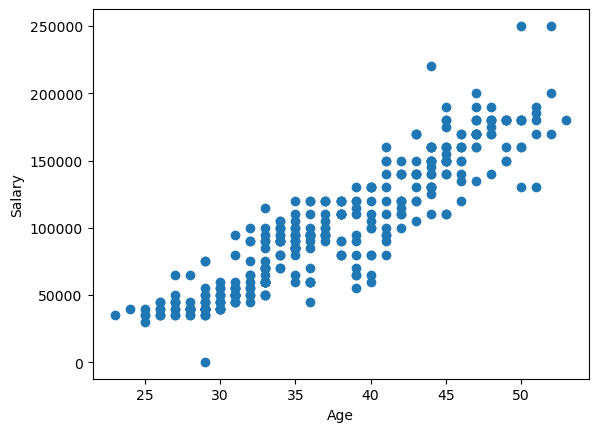

In [136]:
#Case 2


plt.scatter(x = salary_df['Age'],
            y = salary_df['Salary']);
plt.xlabel('Age')
plt.ylabel('Salary');

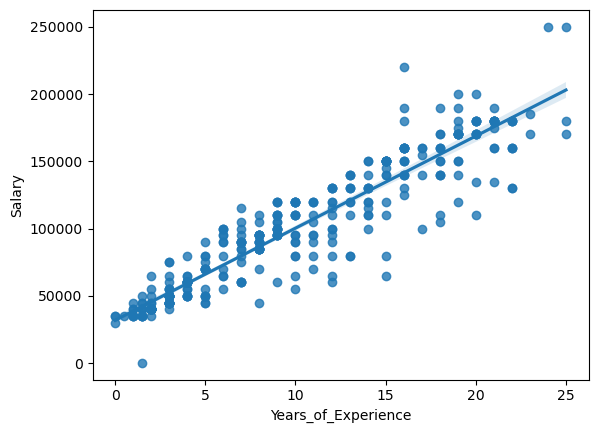

In [137]:
#Case 1
sn.regplot( x = 'Years_of_Experience',
            y = 'Salary',
            data = salary_df );

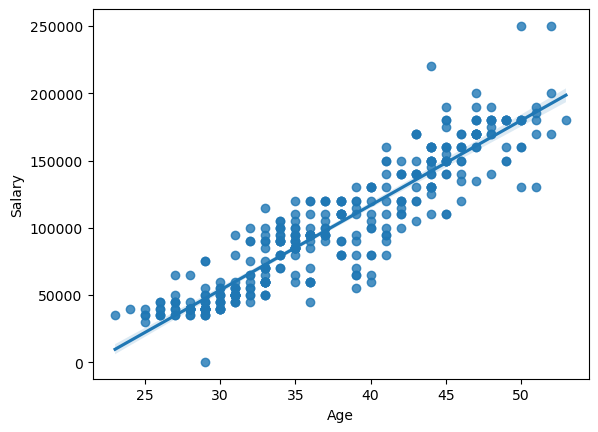

In [138]:
# Case 2
sn.regplot( x = 'Age',
            y = 'Salary',
            data = salary_df );

In [139]:
#Case 1
salary_df['Salary'].corr(salary_df['Years_of_Experience'])

0.9303377227618355

In [140]:
#Case 2
salary_df['Salary'].corr(salary_df['Age'])

0.9223352439166439

## In both the case, correlation postive and is very high. Relation is Linear

In [141]:
# There is a need to create dummy vriables are Gender, education_level is categorical variable with more than 2 vlaues

In [142]:
categorical_features = ['Education_Level']

In [143]:
salary_df = pd.get_dummies( salary_df,columns = categorical_features,drop_first = True ).astype(int) 

In [144]:
salary_df.head(5)

,Age,Gender,Years_of_Experience,Salary,Education_Level_1,Education_Level_2
0,32,1,5,90000,0,0
1,28,0,3,65000,1,0
2,45,1,15,150000,0,1
3,36,0,7,60000,0,0
4,52,1,20,200000,1,0


### Creating Feature Set(X) and Outcome Variable(Y)

In [172]:
#Renaming new dummy variables
salary_df.rename(columns={"Education_Level_1": "Master's", "Education_Level_2": "PhD", "Gender":"Gender_Male"}, inplace=True)


In [191]:
salary_df.head(5)

,Age,Gender_Male,Years_of_Experience,Salary,Master's,PhD
0,32,1,5,90000,0,0
1,28,0,3,65000,1,0
2,45,1,15,150000,0,1
3,36,0,7,60000,0,0
4,52,1,20,200000,1,0


In [173]:
# Build linear regression model using 'Age', 'Gender', 'Education_Level','Years_of_Experience' as predictors
# Split data into predictors X and output Y
#predictors = ['Age', 'Gender', 'Education_Level','Years_of_Experience'] 
X = salary_df.drop('Salary', axis=1) 
Y = salary_df['Salary']

In [174]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Age                  373 non-null    int64
 1   Gender_Male          373 non-null    int64
 2   Years_of_Experience  373 non-null    int64
 3   Master's             373 non-null    int64
 4   PhD                  373 non-null    int64
dtypes: int64(5)
memory usage: 14.7 KB


In [175]:
train_X, test_X, train_y, test_y = train_test_split( X ,
                                                     Y,
                                                    train_size = 0.8,
                                                    random_state = 42 )

# Fit a regression model 

In [176]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf

In [188]:
salary_lm = sm.OLS( train_y, train_X ).fit()

In [189]:
print (salary_lm.params)

Age                     1150.774660
Gender_Male             6586.140255
Years_of_Experience     4511.761572
Master's               19400.023907
PhD                    26814.056162
dtype: float64


In [190]:
salary_lm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.980     
Dependent Variable:     Salary           AIC:                         6602.4370 
Date:                   2023-11-30 10:51 BIC:                         6620.9225 
No. Observations:       298              Log-Likelihood:              -3296.2   
Df Model:               5                F-statistic:                 2985.     
Df Residuals:           293              Prob (F-statistic):          6.20e-249 
R-squared (uncentered): 0.981            Scale:                       2.4124e+08
--------------------------------------------------------------------------------
                         Coef.     Std.Err.    t    P>|t|    [0.025     0.975]  
--------------------------------------------------------------------------------
Age                     1150.7747   69.8262 16.4806 0.0000  1013.3501  1288.1992
Gender_Male             6586.1403 1788.5716  3.6823 0.0003  3066.0642 10106.2163
Years_of_Experience     4511.7616  229.4440 19.6639 0.0000  4060.1943  4963.3288
Master's               19400.0239 2416.1457  8.0293 0.0000 14644.8233 24155.2245
PhD                    26814.0562 3306.7649  8.1088 0.0000 20306.0339 33322.0785
--------------------------------------------------------------------------------
Omnibus:                   14.233            Durbin-Watson:               1.936 
Prob(Omnibus):             0.001             Jarque-Bera (JB):            35.175
Skew:                      -0.015            Prob(JB):                    0.000 
Kurtosis:                  4.683             Condition No.:               158   
================================================================================
Notes:
[1] R² is computed without centering (uncentered) since the
model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly
specified.
"""

In [180]:
pred_y = salary_lm.predict( test_X )

In [181]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

## Mean Absolute Error

In [182]:
mean_absolute_error(test_y, pred_y)

10119.586902018353

## Mean Square Error

In [183]:
mean_squared_error(test_y, pred_y)

209714023.06509057

## Root Mean Square Error

In [184]:
np.sqrt(mean_squared_error(test_y, pred_y))

14481.506242966943

In [185]:
np.abs(r2_score(test_y, pred_y))

0.9125310401781696